In [1]:
#!pip install trafilatura

In [2]:
import os

import numpy as np
import pandas as pd

from lxml import html
from bs4 import BeautifulSoup
import trafilatura

In [3]:
#!npx degit kelu124/substack/.archive substack --force

In [4]:
files = os.listdir('.archive')
file_names = []
for name in files:
    if not ('type' in name):
        file_names.append(name)

In [5]:
D = pd.read_parquet('articles.parquet.gzip')

In [6]:
DONE = list(D.file_name)

In [7]:
import io

In [8]:
articles = []
errors = []
for file_name in file_names:
    if file_name not in DONE:
        with io.open(f'.archive/{file_name}', mode="r", encoding="utf-8") as f:
            try:
                mytree = html.fromstring("".join(f.readlines()))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)
                continue
            try:
                content = trafilatura.extract(mytree)
                articles.append((file_name, content))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)

1adf22e202e6fbf70cab0817e9900a63 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
90ff840ab083c871304f6c064a686163 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
ae139bd8ae8643afb759fbac296ee6f9 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
f0a23dcd98c2fdf0a3fd523a04e7c255 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
679dc202eff2e27018dc9d59ef4ab209 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
14d1644363556a7c406cd6c2b4b824b1 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d5d984108e1458c134b8b5d1bb3a3baa 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
c6f072d0bb096cc48a03e042dc98a9d9 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
18cfbb0e23ac94c1ae56348a3663c73c 'lxml.etree._Element' object has no attribute 'text_content'
3cb0698c48f534f632b96a09dd33654c 'utf-8' codec can't decode byte 0

67114c9377cddb5995374e77a4504dd8 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
9e3df9dec95cee1464d33e4ab8528d91 'lxml.etree._Element' object has no attribute 'text_content'
5c36691a8f1b00d08798cc35760342d1 Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
2472e15bbf9facc2438c0590f0fcb450 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
5d1cdb0f6eee28bb803f33c909ed50f2 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
54711e3d7ac2cdddd901964714a8474e 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
0637378bfd5702dcc28e96b8c25365c9 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
ee0908b4d5c1e0a71b013e24ec3098a1 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
77bc94d40d0e9a03b3867894baa37a5d 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuat

e62811497d9e4167e340ec3d4358ceaa 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte


In [9]:
NEW = pd.DataFrame(articles, columns = ['file_name', 'content'])
NEW["LEN"] = NEW["content"].apply(lambda x: len(str(x)))
NEW

,file_name,content,LEN
0,cea16dfec561c12861cfadf0455880f1,AI is helping US spies catch stealthy Chinese ...,3695
1,d754710be61a44192e7426d916a9e803,Discover DocLLM: The New LLM From JPMorgan For...,2109
2,4be308670b5c0c5a47ba2b0185459ff4,"TSMC 2nm Update: Two Fabs in Construction, One...",6258
3,159da51824bd2447c69245e7e92205e6,You are here\nEver heard of Termignon blue? Th...,6902
4,fab9bdf321e837824b35d685a6334673,Building A Graph+LLM Powered RAG Application f...,7217
5,653515af638ace6af47a987f5b3f7c76,"How an Ugly Single-Page Website Makes $5,000 a...",1824
6,20dcd5f1dfbe5f80a079ad28644cf08f,Dostovesky suggests an appeal to the nation un...,12812
7,c95c67faf6b15cb5595e1d7caa1b8e48,Introduction\nHave you ever wondered how life’...,10126
8,929be0e8bd9dc665384dbc6bedd4201f,The concept of “ask culture” and “guess cultur...,7684
9,65b2d69656e5ea98828b1587df1ddb7e,What if you could just... speak... to video ga...,8909


In [10]:
len(NEW),len(D)

(17, 1726)

In [11]:
df = pd.concat([NEW,D]).reset_index(drop=True)
len(df)
df

,file_name,content,LEN
0,cea16dfec561c12861cfadf0455880f1,AI is helping US spies catch stealthy Chinese ...,3695
1,d754710be61a44192e7426d916a9e803,Discover DocLLM: The New LLM From JPMorgan For...,2109
2,4be308670b5c0c5a47ba2b0185459ff4,"TSMC 2nm Update: Two Fabs in Construction, One...",6258
3,159da51824bd2447c69245e7e92205e6,You are here\nEver heard of Termignon blue? Th...,6902
4,fab9bdf321e837824b35d685a6334673,Building A Graph+LLM Powered RAG Application f...,7217
...,...,...,...
1738,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1739,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1740,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1741,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [12]:
df.to_parquet('articles.parquet.gzip',compression="gzip")

In [13]:
# More testing here about the coherent text that has to be found, find upper elements if p doesn't mention classes. 
# or merge everything than clean up.


In [14]:
df = pd.read_parquet('articles.parquet.gzip')
df

,file_name,content,LEN
0,cea16dfec561c12861cfadf0455880f1,AI is helping US spies catch stealthy Chinese ...,3695
1,d754710be61a44192e7426d916a9e803,Discover DocLLM: The New LLM From JPMorgan For...,2109
2,4be308670b5c0c5a47ba2b0185459ff4,"TSMC 2nm Update: Two Fabs in Construction, One...",6258
3,159da51824bd2447c69245e7e92205e6,You are here\nEver heard of Termignon blue? Th...,6902
4,fab9bdf321e837824b35d685a6334673,Building A Graph+LLM Powered RAG Application f...,7217
...,...,...,...
1738,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1739,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1740,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1741,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [15]:
# Removing unaccessible articles
df = df[~(df['content'] == "Please switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.\nHelp Center\nTerms of Service\nPrivacy Policy\nCookie Policy\nImprint\nAds info\n© 2022 Twitter, Inc.")]
df = df[df.LEN >= 1500]
df

,file_name,content,LEN
0,cea16dfec561c12861cfadf0455880f1,AI is helping US spies catch stealthy Chinese ...,3695
1,d754710be61a44192e7426d916a9e803,Discover DocLLM: The New LLM From JPMorgan For...,2109
2,4be308670b5c0c5a47ba2b0185459ff4,"TSMC 2nm Update: Two Fabs in Construction, One...",6258
3,159da51824bd2447c69245e7e92205e6,You are here\nEver heard of Termignon blue? Th...,6902
4,fab9bdf321e837824b35d685a6334673,Building A Graph+LLM Powered RAG Application f...,7217
...,...,...,...
1737,3fbb11d6e949d1e662aa6a146bb6cda0,China’s growing number of insomniacs are turni...,2859
1738,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1739,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1740,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489


In [16]:
df.describe()

,LEN
count,1398.000000
mean,11503.170959
std,19739.008693
min,1505.000000
25%,3782.000000
50%,6837.000000
75%,12857.500000
max,496896.000000


In [17]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(df['content'])

# Check Shape of Count Vector
X_train_counts.shape

(1398, 1133997)

In [18]:
X_train_counts[0]

<1x1133997 sparse matrix of type '<class 'numpy.float64'>'
	with 515 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=10).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

In [20]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

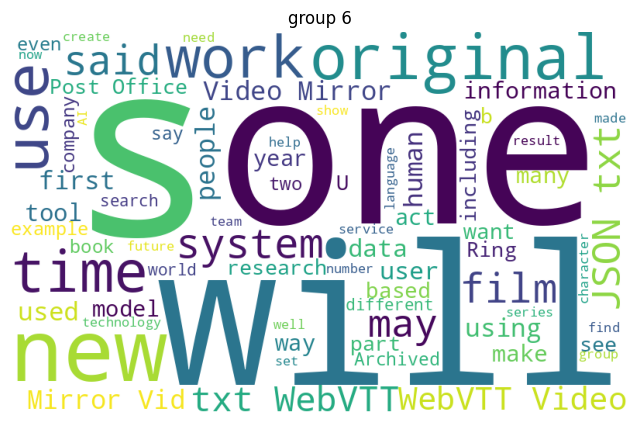

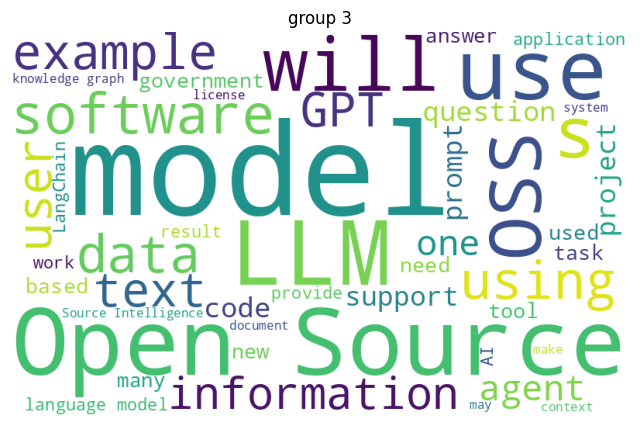

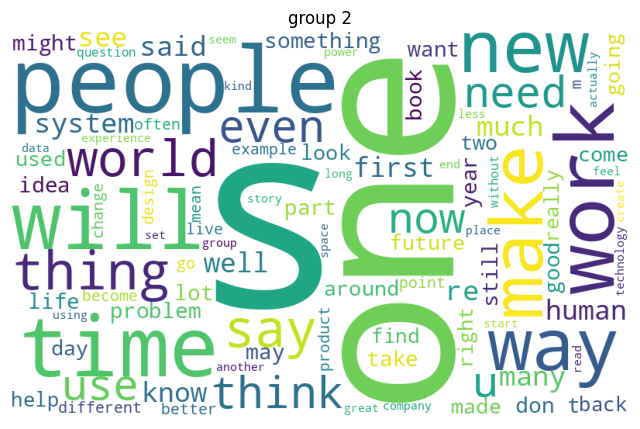

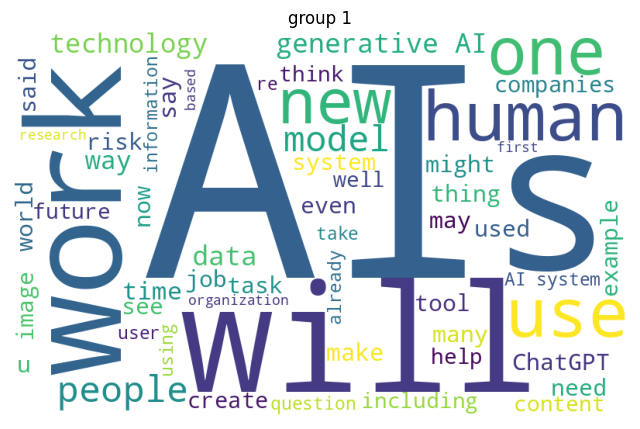

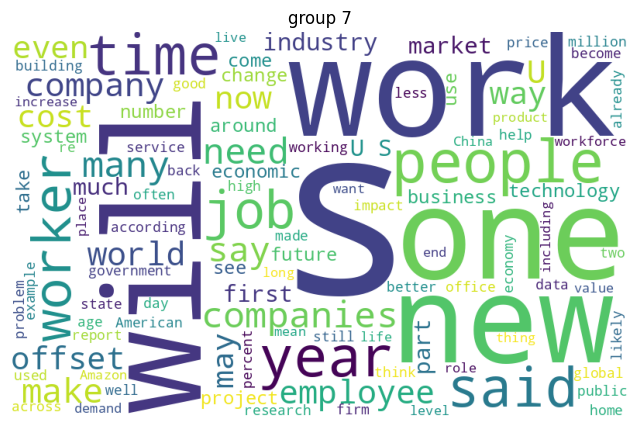

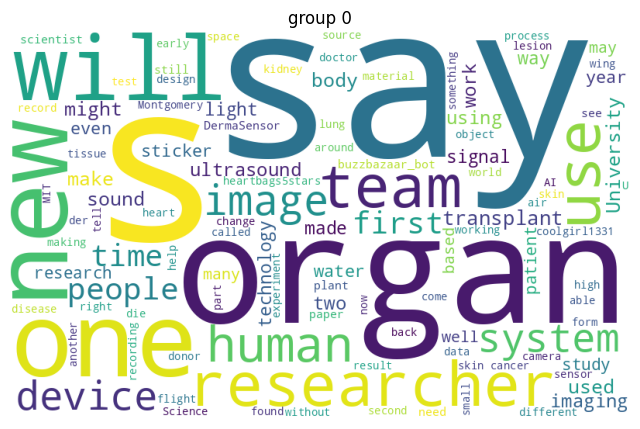

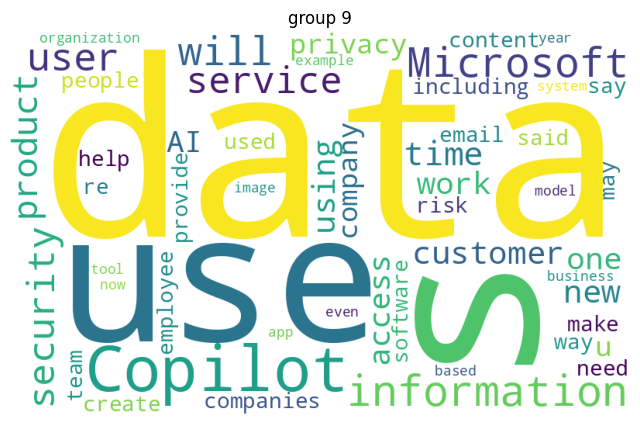

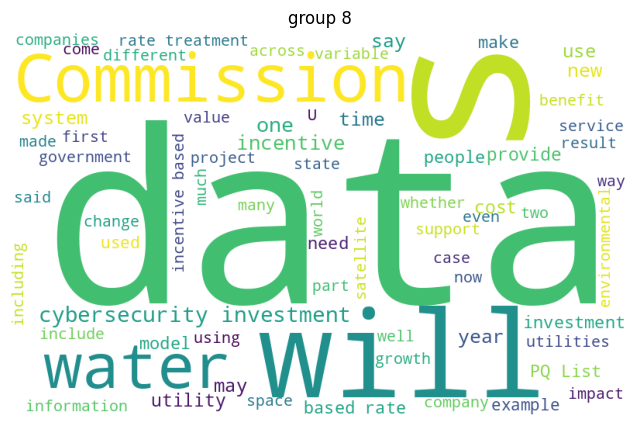

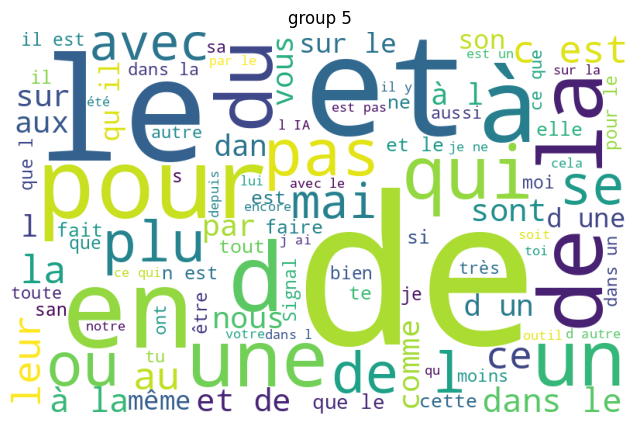

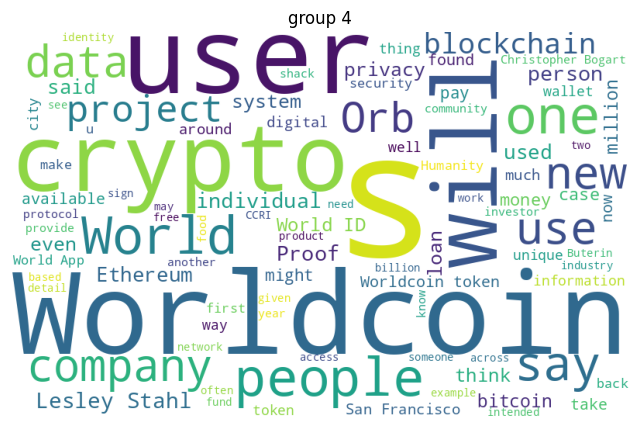

In [21]:
import pandas as pd
new_df=pd.DataFrame({"text":df['content'],"labels":pred_labels})


for i in new_df.labels.unique():
    new_new_df=new_df[new_df.labels==i]
    text="".join(new_new_df.text.tolist())
    word_cloud(text,f"group {i}",f'{i}.jpeg')

In [22]:
# new_df includes the category for errord ones as well.

# No context is given, so the group name is default to the group number.

# We can use the common words found in each group to formulate a title?
new_df.to_csv('grouped_articles.csv')

In [23]:
new_df

,text,labels
0,AI is helping US spies catch stealthy Chinese ...,6
1,Discover DocLLM: The New LLM From JPMorgan For...,3
2,"TSMC 2nm Update: Two Fabs in Construction, One...",2
3,You are here\nEver heard of Termignon blue? Th...,6
4,Building A Graph+LLM Powered RAG Application f...,3
...,...,...
1737,China’s growing number of insomniacs are turni...,6
1738,I would say my efficiency is up ~20% since sta...,2
1739,The U.S. government has restricted sales of Nv...,7
1740,My kids and I just played D&D with ChatGPT4 as...,2
